In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('synthetic_credit_card_approval.csv')

# Display first few rows
df.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1


In [4]:
# Shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and summary
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))

Shape: (500000, 6)
Columns: ['Num_Children', 'Group', 'Income', 'Own_Car', 'Own_Housing', 'Target']

Data Types:
 Num_Children    int64
Group           int64
Income          int64
Own_Car         int64
Own_Housing     int64
Target          int64
dtype: object

Summary Statistics:
         Num_Children         Group         Income        Own_Car  \
count  500000.000000  500000.00000  500000.000000  500000.000000   
mean        2.000346       0.50065   72507.446898       0.700930   
std         1.410574       0.50000   22960.209440       0.457851   
min         0.000000       0.00000   30000.000000       0.000000   
25%         1.000000       0.00000   53321.000000       0.000000   
50%         2.000000       1.00000   72060.000000       1.000000   
75%         3.000000       1.00000   90670.250000       1.000000   
max        11.000000       1.00000  119999.000000       1.000000   

         Own_Housing         Target  
count  500000.000000  500000.000000  
mean        0.401612       0.

In [7]:
from sklearn.impute import SimpleImputer

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Impute numeric features
num_imputer = SimpleImputer(strategy='mean')
df[['Num_Children', 'Income']] = num_imputer.fit_transform(df[['Num_Children', 'Income']])

# Impute categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Group', 'Own_Car', 'Own_Housing']] = cat_imputer.fit_transform(df[['Group', 'Own_Car', 'Own_Housing']])

# Verify
print("After imputation, missing values:\n", df.isnull().sum())


Missing values:
 Num_Children    0
Group           0
Income          0
Own_Car         0
Own_Housing     0
Target          0
dtype: int64
After imputation, missing values:
 Num_Children    0
Group           0
Income          0
Own_Car         0
Own_Housing     0
Target          0
dtype: int64


In [8]:
import pandas as pd

# One-hot encode 'Group' assuming it is a nominal categorical variable
df = pd.get_dummies(df, columns=['Group'], drop_first=True)

# Display the first few rows after encoding
df.head()


,Num_Children,Income,Own_Car,Own_Housing,Target,Group_1
0,4.0,36151.0,0,0,0,False
1,0.0,36095.0,1,0,0,False
2,2.0,62110.0,1,1,0,True
3,0.0,73644.0,1,0,0,True
4,3.0,99146.0,0,0,1,False


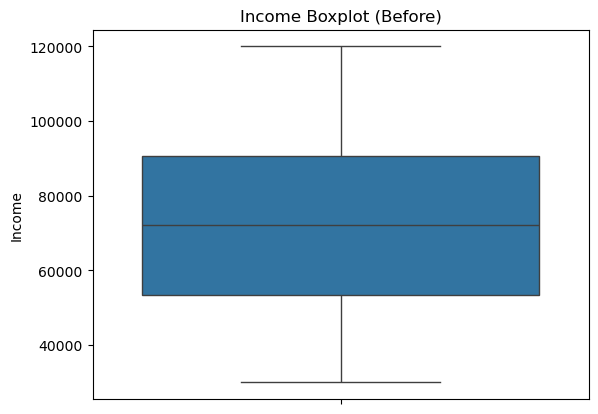

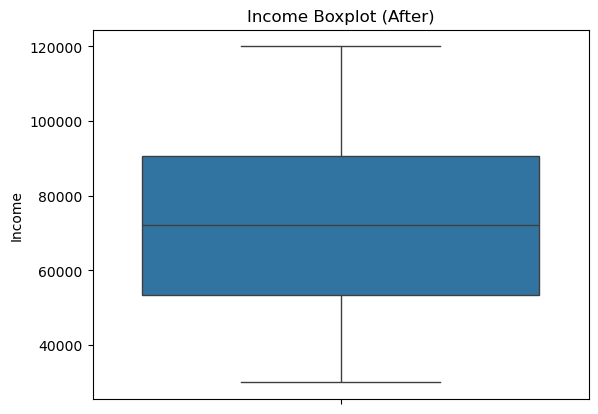

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot before removing outliers
sns.boxplot(df['Income'])
plt.title("Income Boxplot (Before)")
plt.show()

# Detect outliers using IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Income'] = np.where(df['Income'] > upper_bound, upper_bound, 
                        np.where(df['Income'] < lower_bound, lower_bound, df['Income']))

# Boxplot after handling outliers
sns.boxplot(df['Income'])
plt.title("Income Boxplot (After)")
plt.show()


In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('synthetic_credit_card_approval.csv')

# Features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Check class distribution before
print("Before SMOTE:\n", y.value_counts())

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Check class distribution after
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())


Before SMOTE:
 Target
0    306687
1    193313
Name: count, dtype: int64
After SMOTE:
 Target
0    306687
1    306687
Name: count, dtype: int64


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Log-transform Income to reduce skew
X_resampled['Income'] = np.log1p(X_resampled['Income'])

# Normalize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Convert to DataFrame again for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)
X_scaled_df.head()


,Num_Children,Group,Income,Own_Car,Own_Housing
0,1.492239,-1.061450,-2.086621,-1.505548,-0.795959
1,-1.403867,-1.061450,-2.091234,0.664210,-0.795959
2,0.044186,0.942107,-0.476430,0.664210,1.256346
3,-1.403867,0.942107,0.030358,0.664210,-0.795959
4,0.768212,-1.061450,0.915048,-1.505548,-0.795959


In [4]:
from sklearn.model_selection import train_test_split

# Final split for model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

# Display the shape of the resulting sets
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (429361, 5)
Testing shape: (184013, 5)
